## Predicting Migration with the help of machine learning algorithms

#### Migration of people is generally the concept of human mobility to change their domicile.
#### Predicting human migration as accurately as possible is important in city planning applications, international trade, the spread of infectious diseases, conservation planning, and public policymaking.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv('migration_nz.csv')
data.head(10)

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0
5,Arrivals,Antarctica,Total All Citizenships,1979,13.0
6,Arrivals,American Samoa,New Zealand Citizen,1979,17.0
7,Arrivals,American Samoa,Australian Citizen,1979,4.0
8,Arrivals,American Samoa,Total All Citizenships,1979,30.0
9,Arrivals,Australia,New Zealand Citizen,1979,8224.0


#### For predicting the result, the first step is to convert all the string type variables in 'Measure' , 'Country' and 'Citizenship' column to numeric(integer) variables. 
#### Lets look at the categories in 'Measure' column.

In [3]:
data['Measure'].unique()

array(['Arrivals', 'Departures', 'Net'], dtype=object)

#### As the number of categories are less in the Measure column, we can use the replace function:

In [4]:
data['Measure'].replace("Arrivals",0,inplace=True)
data['Measure'].replace("Departures",1,inplace=True)
data['Measure'].replace("Net",2,inplace=True)

In [5]:
data['Measure'].unique()

array([0, 1, 2], dtype=int64)

In [6]:
data['Country'].unique()

array(['Oceania', 'Antarctica', 'American Samoa', 'Australia',
       'Cocos Islands', 'Cook Islands', 'Christmas Island', 'Fiji',
       'Micronesia', 'Guam', 'Kiribati', 'Marshall Islands',
       'Northern Mariana Islands', 'New Caledonia', 'Norfolk Island',
       'Nauru', 'Niue', 'New Zealand', 'French Polynesia',
       'Papua New Guinea', 'Pitcairn Island', 'Palau', 'Solomon Islands',
       'French Southern Territories', 'Tokelau', 'Tonga', 'Tuvalu',
       'Vanuatu', 'Wallis and Futuna', 'Samoa', 'Asia', 'Afghanistan',
       'Armenia', 'Azerbaijan', 'Bangladesh', 'Brunei Darussalam',
       'Bhutan', 'China', 'Georgia', 'Hong Kong', 'Indonesia', 'India',
       'Japan', 'Kyrgyzstan', 'Cambodia', 'North Korea', 'South Korea',
       'Kazakhstan', 'Laos', 'Sri Lanka', 'Myanmar', 'Mongolia', 'Macau',
       'Maldives', 'Malaysia', 'Nepal', 'Philippines', 'Pakistan',
       'Singapore', 'Thailand', 'Tajikistan', 'Timor-Leste',
       'Turkmenistan', 'Taiwan', 'Uzbekistan', 'Vietn

In [7]:
data['Citizenship'].unique()

array(['New Zealand Citizen', 'Australian Citizen',
       'Total All Citizenships'], dtype=object)

#### As the number of categories are more in the Country and Citizenship column we may use the factorize function which  helps to get the numeric representation of an array by identifying distinct values:

In [8]:
data['CountryID'] = pd.factorize(data.Country)[0]
data['CitID'] = pd.factorize(data.Citizenship)[0]

In [9]:
data['CountryID'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [10]:
data['CitID'].unique()

array([0, 1, 2], dtype=int64)

#### The other thing that we need to check before applying machine learning algorithm is the presence of missing values in the dataset:

In [11]:
data.isnull().sum()

Measure         0
Country         0
Citizenship     0
Year            0
Value          72
CountryID       0
CitID           0
dtype: int64

#### We see that the 'Values' column has 72 missing values , so we replace the missing values with the median values of the column:

In [12]:
data['Value'].fillna(data['Value'].median(),inplace=True)

In [13]:
data.isnull().sum()

Measure        0
Country        0
Citizenship    0
Year           0
Value          0
CountryID      0
CitID          0
dtype: int64

In [14]:
data.head()

,Measure,Country,Citizenship,Year,Value,CountryID,CitID
0,0,Oceania,New Zealand Citizen,1979,11817.0,0,0
1,0,Oceania,Australian Citizen,1979,4436.0,0,1
2,0,Oceania,Total All Citizenships,1979,19965.0,0,2
3,0,Antarctica,New Zealand Citizen,1979,10.0,1,0
4,0,Antarctica,Australian Citizen,1979,0.0,1,1


#### We also need to drop the 'Country' and 'Citizenship' column as we cannot apply algorithm on it:

In [15]:
data.drop('Country', axis=1, inplace=True)
data.drop('Citizenship', axis=1, inplace=True)
from sklearn.model_selection import train_test_split
X= data[['CountryID','Measure','Year','CitID']].to_numpy()
Y= data['Value'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
  X, Y, test_size=0.3, random_state=9)

#### In this dataset we use the random forest regressor algorithm as this algorithm can be used for both regression and classification problem:

In [16]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=70,max_features = 3,max_depth=5,n_jobs=-1)
rf.fit(X_train ,y_train)
rf.score(X_test, y_test)

0.7429026994768333

#### Plotting the graph of migration through the course of years:

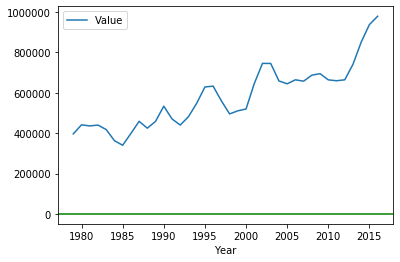

In [17]:
X = data[['CountryID','Measure','Year','CitID']]
Y = data['Value']
X_train, X_test, y_train, y_test = train_test_split(
  X, Y, test_size=0.3, random_state=9)
grouped = data.groupby(['Year']).aggregate({'Value' : 'sum'})


#Growth of migration to New-Zeland by year
grouped.plot(kind='line');plt.axhline(0, color='g')
plt.show()

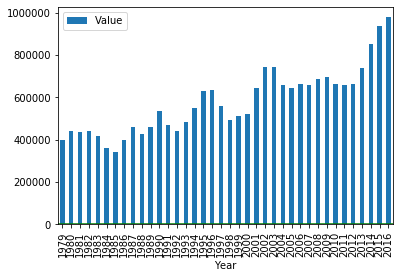

In [18]:
grouped.plot(kind='bar');plt.axhline(0, color='g')
plt.show()

#### Finding the correlation between the different columns:

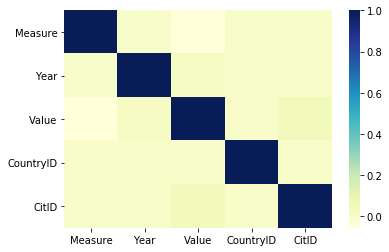

In [19]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap="YlGnBu")
plt.show()